In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [113]:
data=pd.read_csv('Cardiotocographic.csv')
data.head()

LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0

In [114]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [115]:
data.shape

(2126, 14)

In [116]:
data.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

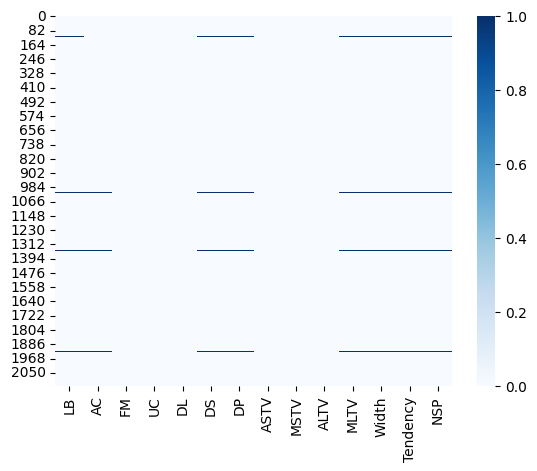

In [117]:
cols=data.columns
sns.heatmap(data[cols].isnull(),cmap="Blues")
plt.show()

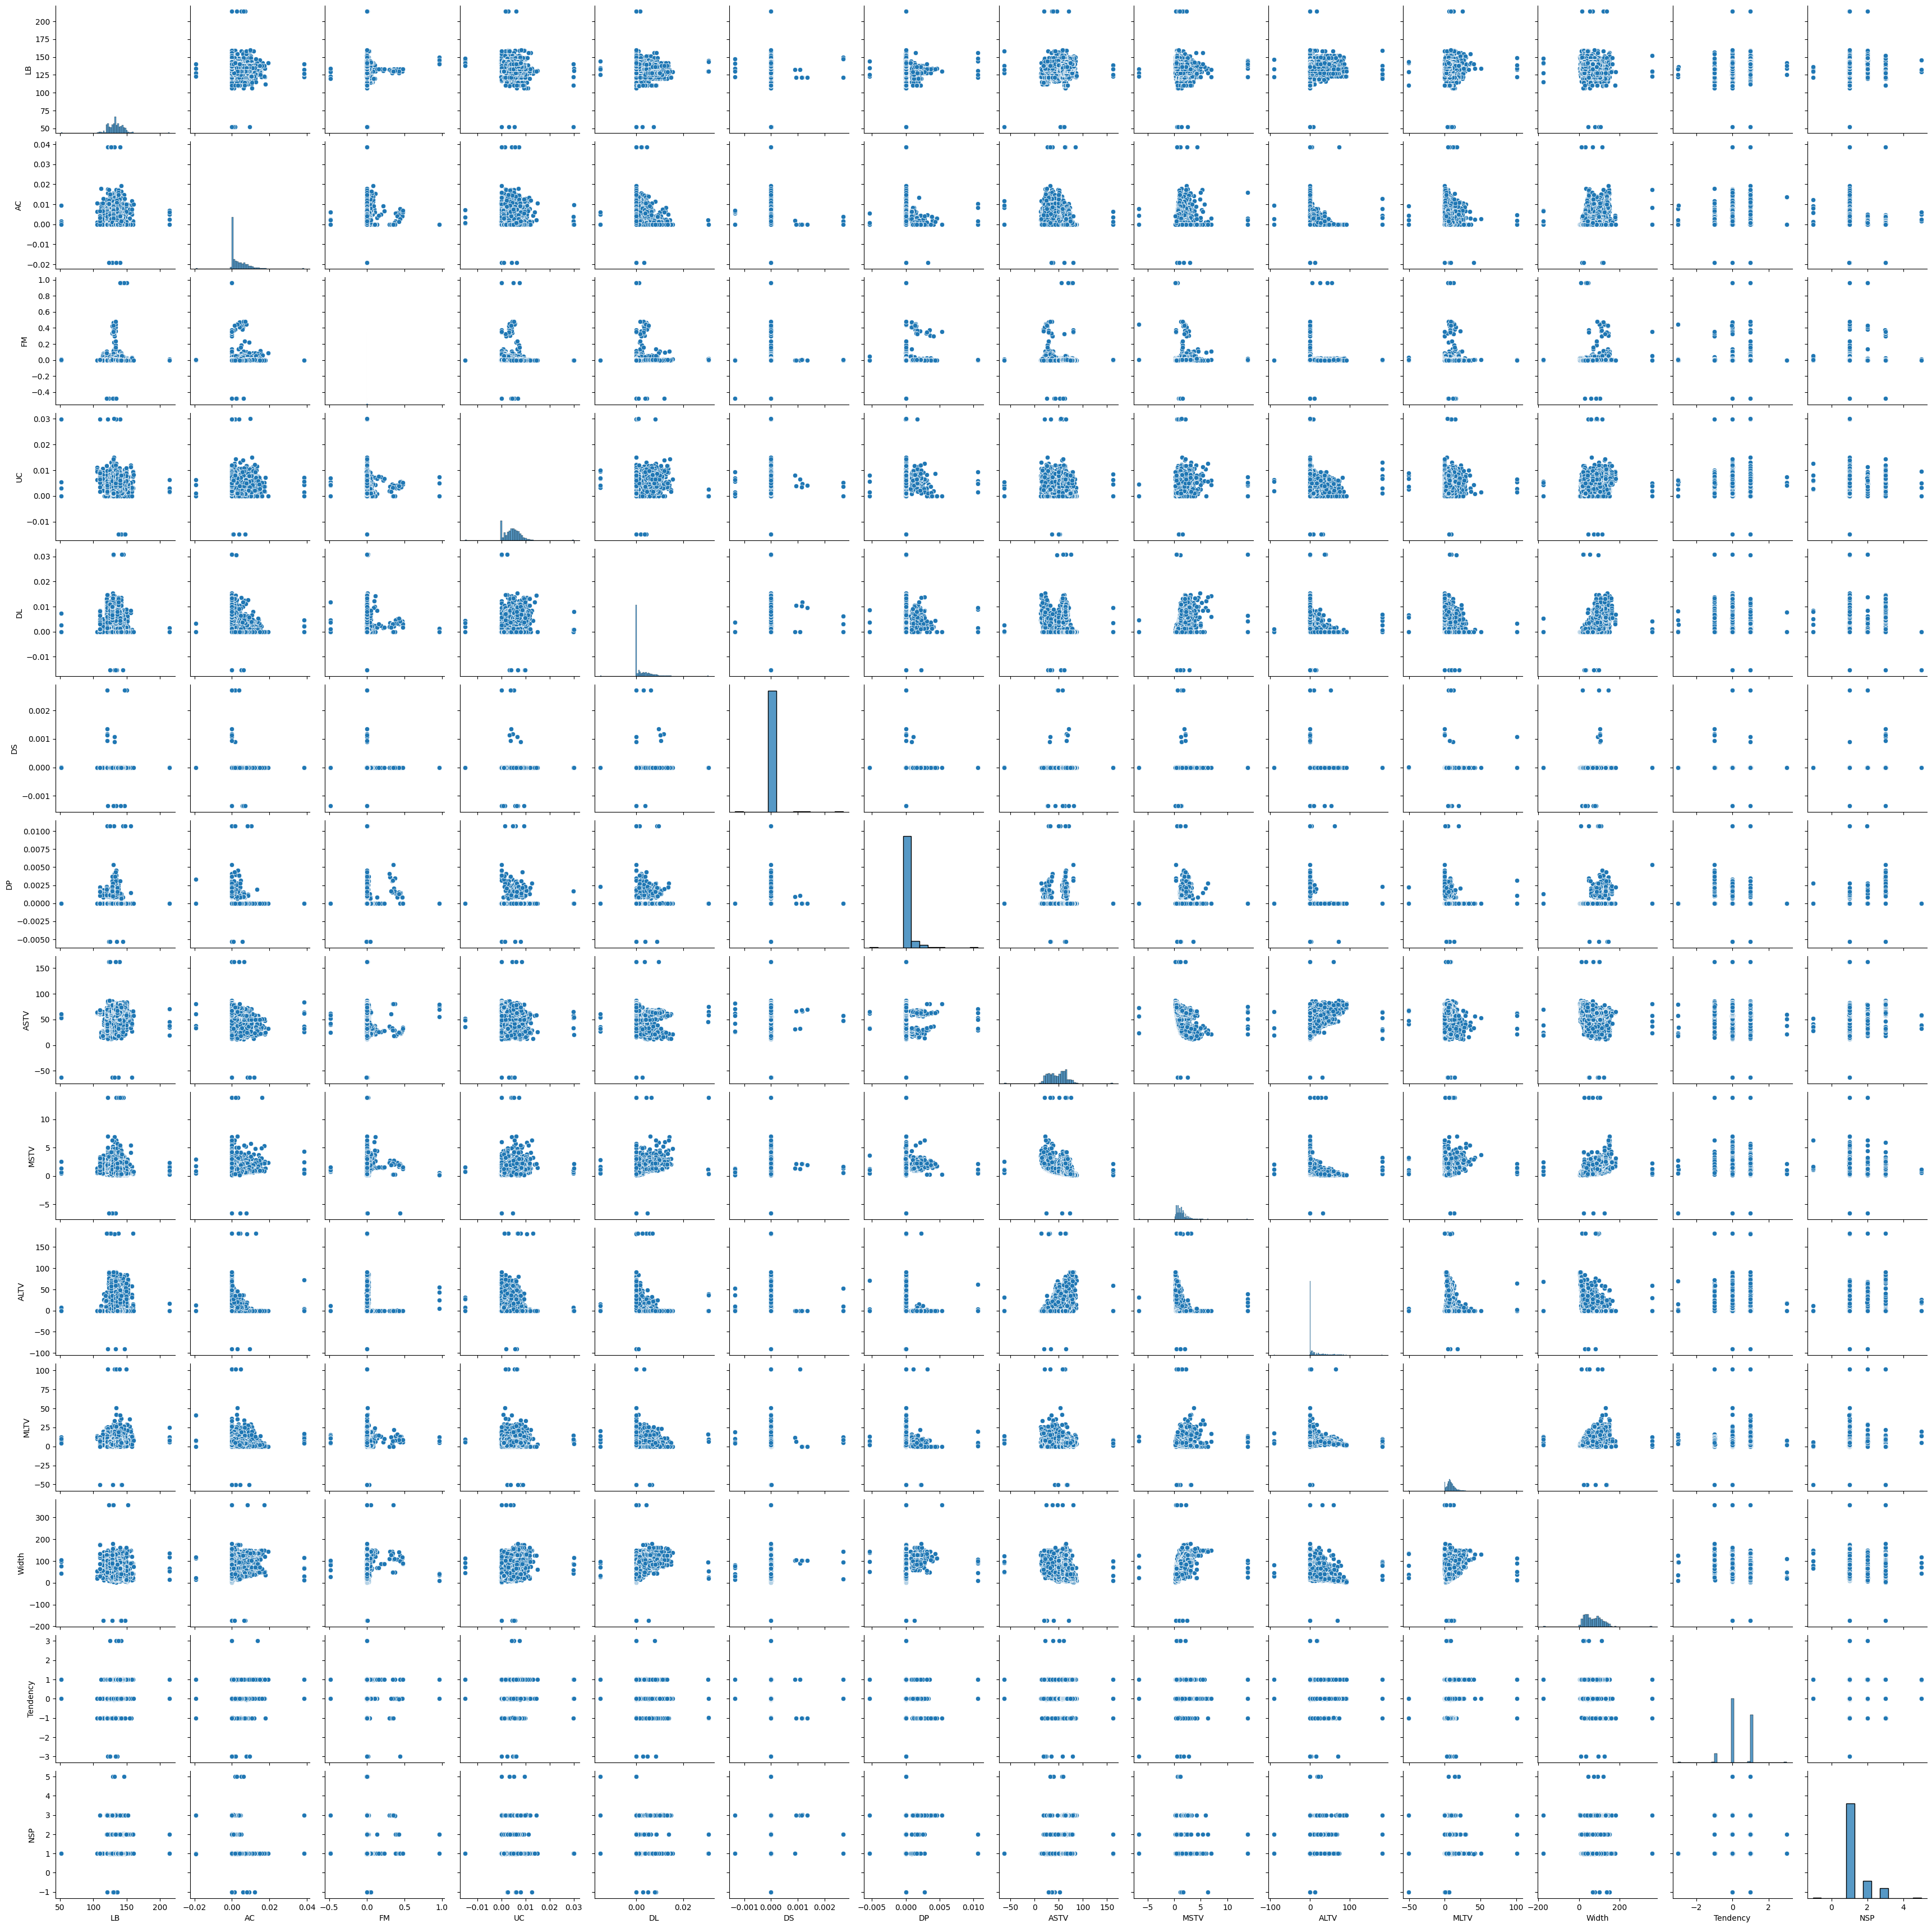

In [140]:
sns.pairplot(data)
plt.show()

In [141]:
df=data.drop(["DS","Tendency","NSP"],axis=1)
df

LB        AC        FM        UC        DL   DP  ASTV  MSTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  73.0   0.5   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  17.0   2.1   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  16.0   2.1   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  16.0   2.4   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  16.0   2.4   
...          ...       ...       ...       ...       ...  ...   ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  79.0   0.2   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  78.0   0.4   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  79.0   0.4   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  78.0   0.4   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  74.0   0.4   

           ALTV  MLTV  Width  
0     43.000000   2.4   64.0  
1      0.000000  10.4  130.0  
2      0.000000  13.4  130.0  
3      0.000000  23.0  117.0  
4      0.000000  19.9  117.0  
...         ...   ...    ...  
2121  25.000000   7.2   40.0  
2122  22.000000   7.1   66.0  
2123  20.000000   6.1   67.0  
2124  27.000000   7.0   66.0  
2125  35.857183   5.0   42.0  

[2126 rows x 11 columns]

In [142]:
df[df.duplicated()].shape

(6, 11)

In [143]:
df[df.duplicated()]

LB        AC        FM        UC        DL        DP  ASTV  MSTV  \
68    140.0  0.007278  0.000000  0.004367  0.000000  0.000000  34.0   1.2   
333   144.0  0.000000  0.018541  0.000000  0.000000  0.000000  76.0   0.4   
807   146.0  0.000000  0.000000  0.001166  0.000000  0.000000  53.0   0.5   
1115  122.0  0.000000  0.000000  0.000000  0.000000  0.000000  19.0   1.9   
1381  121.0  0.000000  0.000000  0.003478  0.005217  0.001739  24.0   1.5   
1458  148.0  0.004717  0.000000  0.002358  0.000000  0.000000  40.0   0.9   

      ALTV  MLTV  Width  
68     0.0  10.3   60.0  
333   61.0  10.6   81.0  
807   32.0   8.2   27.0  
1115   0.0  15.1   39.0  
1381   0.0   0.0   68.0  
1458   0.0  10.6   35.0

In [144]:
df.drop_duplicates()

LB        AC        FM        UC        DL   DP  ASTV  MSTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  73.0   0.5   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  17.0   2.1   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  16.0   2.1   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  16.0   2.4   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  16.0   2.4   
...          ...       ...       ...       ...       ...  ...   ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  79.0   0.2   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  78.0   0.4   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  79.0   0.4   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  78.0   0.4   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  74.0   0.4   

           ALTV  MLTV  Width  
0     43.000000   2.4   64.0  
1      0.000000  10.4  130.0  
2      0.000000  13.4  130.0  
3      0.000000  23.0  117.0  
4      0.000000  19.9  117.0  
...         ...   ...    ...  
2121  25.000000   7.2   40.0  
2122  22.000000   7.1   66.0  
2123  20.000000   6.1   67.0  
2124  27.000000   7.0   66.0  
2125  35.857183   5.0   42.0  

[2120 rows x 11 columns]

In [145]:
df.isnull().sum()

LB       21
AC       20
FM        0
UC        0
DL        0
DP       21
ASTV      0
MSTV      0
ALTV      0
MLTV     21
Width    21
dtype: int64

In [146]:
df["LB"].fillna(df["LB"].mean(),inplace=True)
df["AC"].fillna(df["AC"].mean(),inplace=True)
df["DP"].fillna(df["DP"].mean(),inplace=True)
df["MLTV"].fillna(df["MLTV"].mean(),inplace=True)
df["Width"].fillna(df["Width"].mean(),inplace=True)

In [147]:
df.isnull().sum()

LB       0
AC       0
FM       0
UC       0
DL       0
DP       0
ASTV     0
MSTV     0
ALTV     0
MLTV     0
Width    0
dtype: int64

In [148]:
df.describe()

LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DP         ASTV         MSTV         ALTV         MLTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000175    46.995984     1.364378    10.285964     8.284887   
std       0.000836    18.813973     1.173632    21.205041     7.734356   
min      -0.005348   -63.000000    -6.600000   -91.000000   -50.700000   
25%       0.000000    32.000000     0.700000     0.000000     4.600000   
50%       0.000000    49.000000     1.200000     0.000000     7.500000   
75%       0.000000    61.000000     1.700000    11.000000    10.800000   
max       0.010695   162.000000    13.800000   182.000000   101.400000   

             Width  
count  2126.000000  
mean     70.429260  
std      42.719161  
min    -174.000000  
25%      37.000000  
50%      68.000000  
75%     100.000000  
max     357.000000

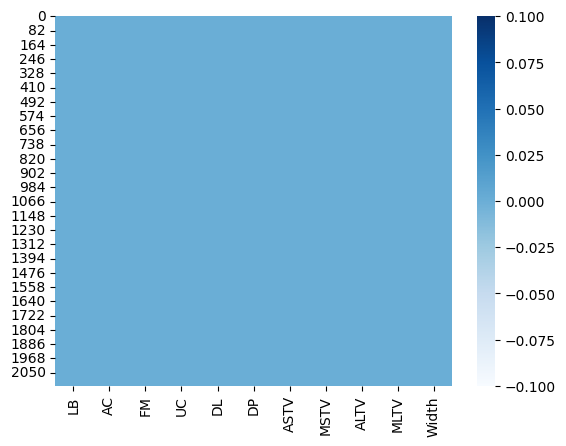

In [149]:
sns.heatmap(df.isnull(),cmap="Blues")
plt.show()

In [150]:
df.mean()

LB       133.343598
AC         0.003219
FM         0.009894
UC         0.004391
DL         0.001895
DP         0.000175
ASTV      46.995984
MSTV       1.364378
ALTV      10.285964
MLTV       8.284887
Width     70.429260
dtype: float64

In [151]:
df.median()

LB       133.000000
AC         0.001668
FM         0.000000
UC         0.004484
DL         0.000000
DP         0.000000
ASTV      49.000000
MSTV       1.200000
ALTV       0.000000
MLTV       7.500000
Width     68.000000
dtype: float64

In [152]:
df.std()

LB       11.214328
AC        0.004370
FM        0.067540
UC        0.003340
DL        0.003343
DP        0.000836
ASTV     18.813973
MSTV      1.173632
ALTV     21.205041
MLTV      7.734356
Width    42.719161
dtype: float64

In [153]:
df.var()

LB       1.257612e+02
AC       1.909743e-05
FM       4.561608e-03
UC       1.115869e-05
DL       1.117352e-05
DP       6.982467e-07
ASTV     3.539656e+02
MSTV     1.377412e+00
ALTV     4.496538e+02
MLTV     5.982026e+01
Width    1.824927e+03
dtype: float64

In [154]:
IQR=df.quantile(0.75)-df.quantile(0.25)
IQR

LB       14.000000
AC        0.005606
FM        0.002567
UC        0.004685
DL        0.003289
DP        0.000000
ASTV     29.000000
MSTV      1.000000
ALTV     11.000000
MLTV      6.200000
Width    63.000000
dtype: float64

In [155]:
numerical_cols=df.select_dtypes(include=["float","int"]).columns
numerical_cols

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
       'Width'],
      dtype='object')

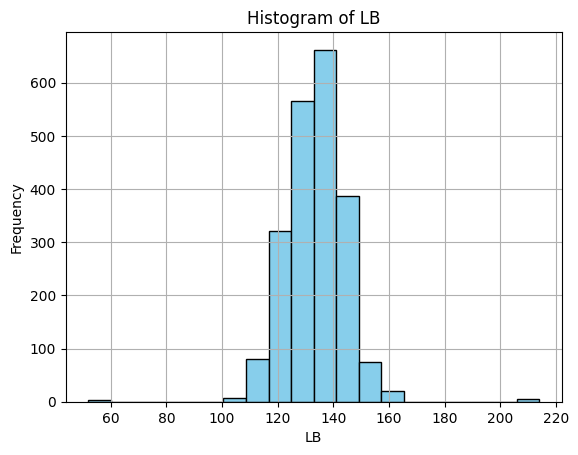

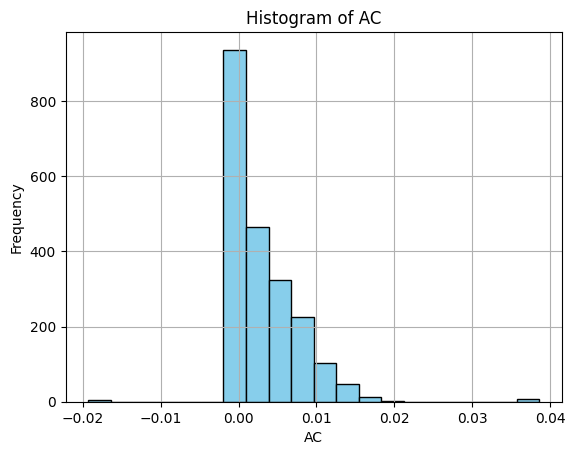

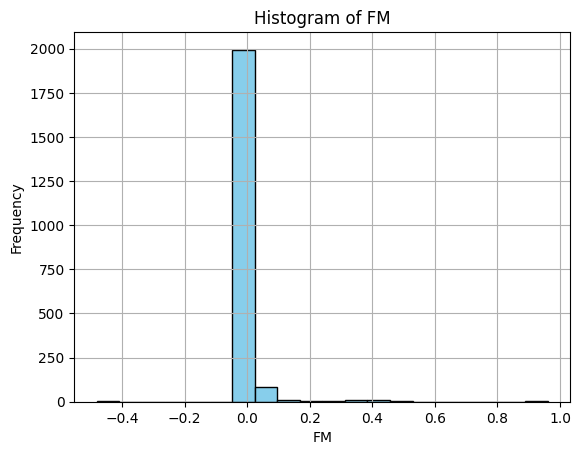

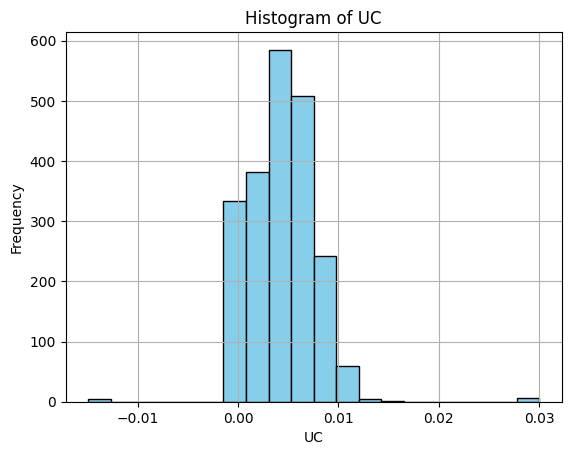

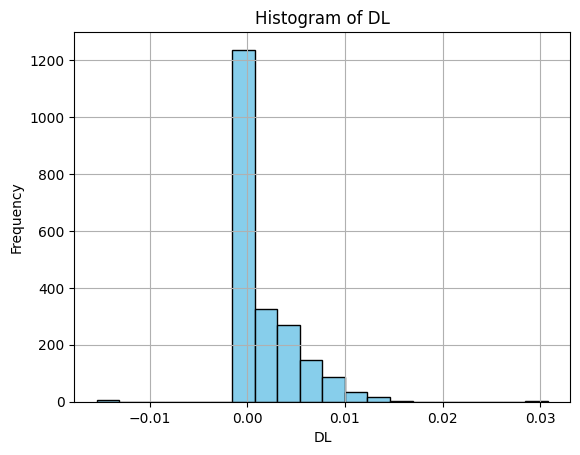

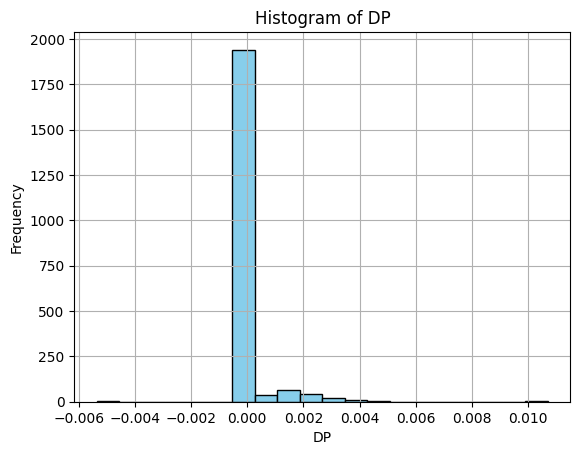

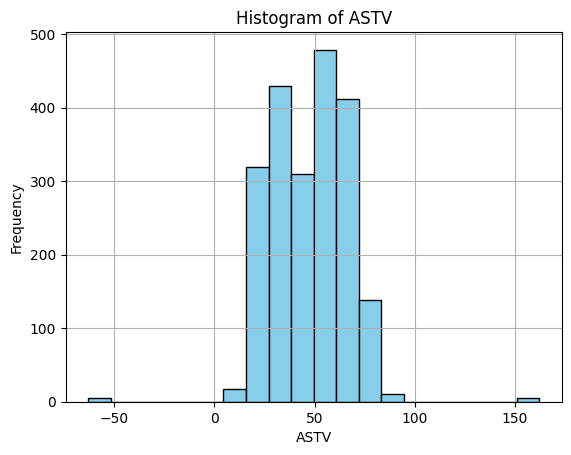

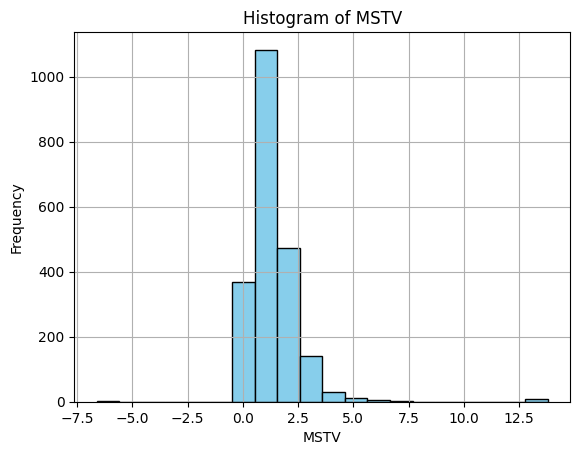

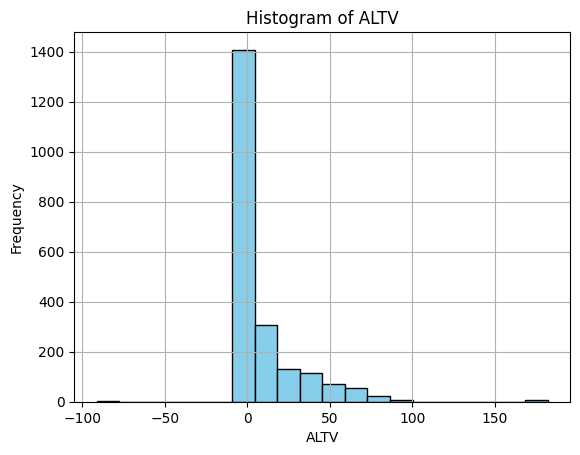

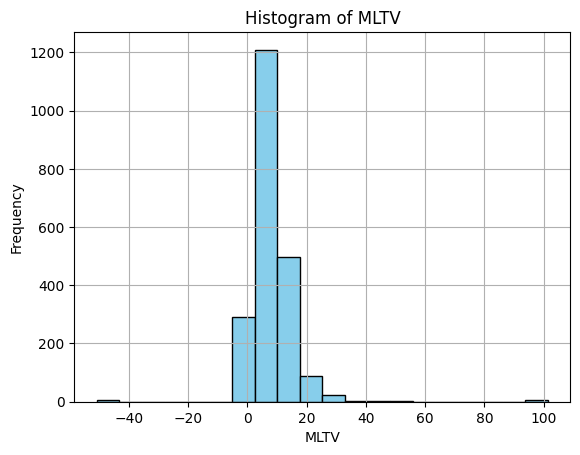

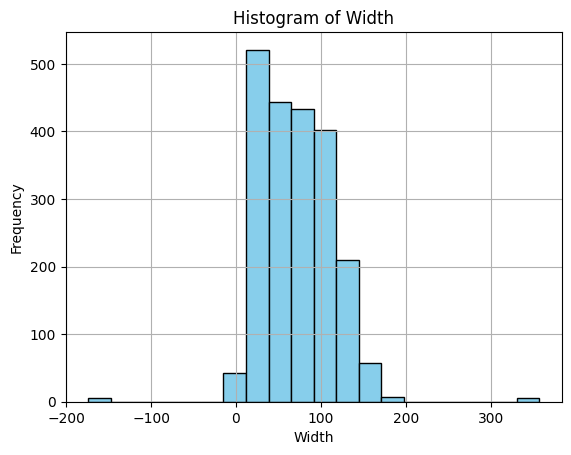

In [156]:
for column in numerical_cols:
   plt.hist(df[column],bins=20,color="skyblue",edgecolor="black")
   plt.title(f"Histogram of {column}")
   plt.xlabel(column)
   plt.ylabel("Frequency")
   plt.grid(True)
   plt.show()

In [157]:
df.skew()

LB       0.322341
AC       2.026328
FM       6.753070
UC       0.974239
DL       2.010390
DP       6.454377
ASTV     0.055872
MSTV     4.142518
ALTV     2.981199
MLTV     3.559044
Width    0.497707
dtype: float64

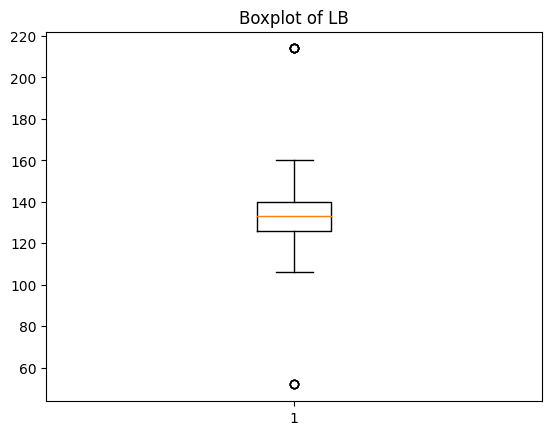

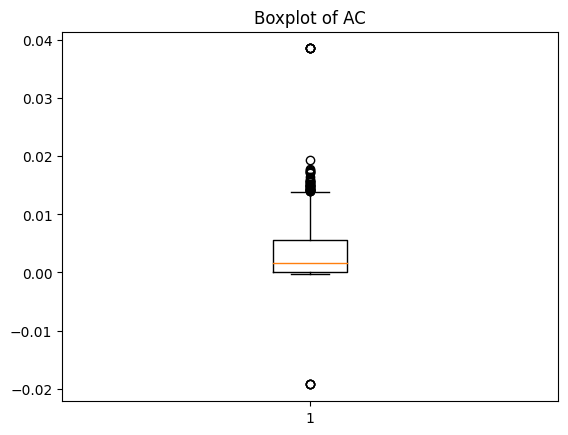

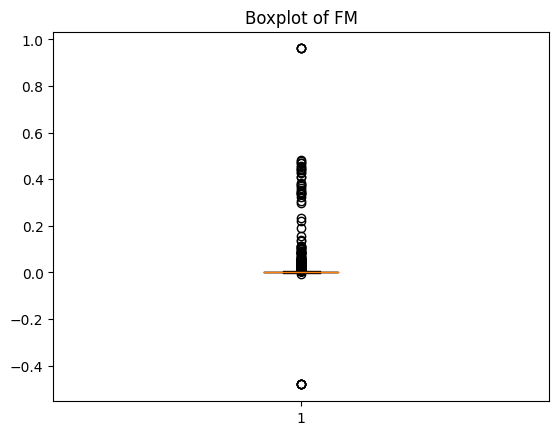

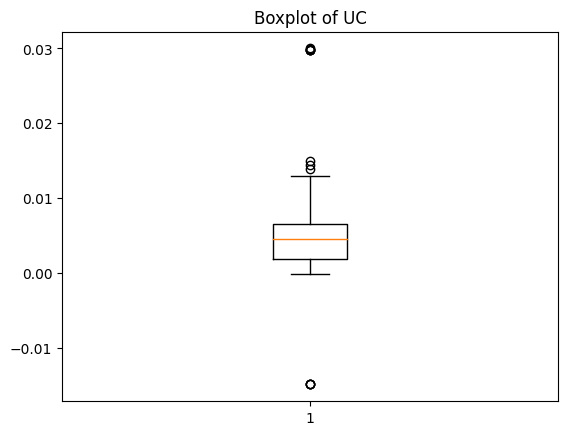

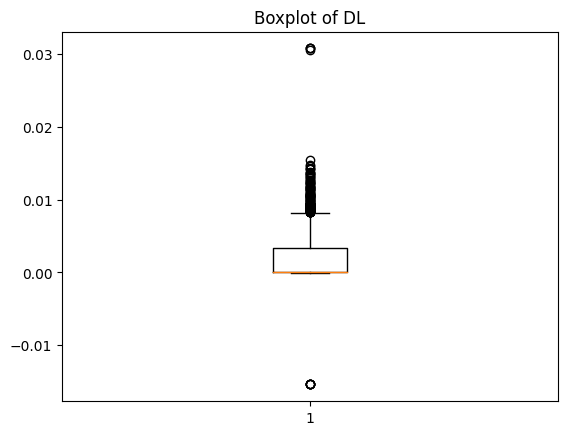

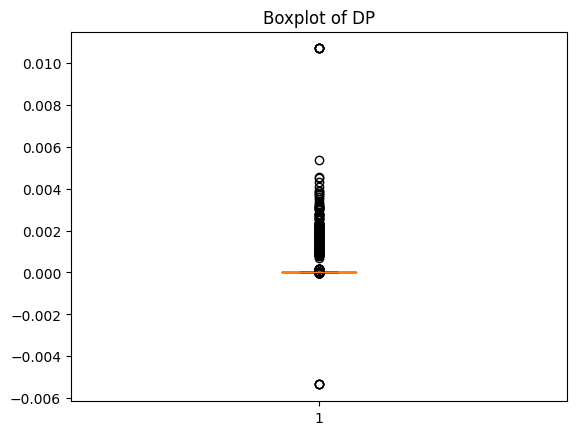

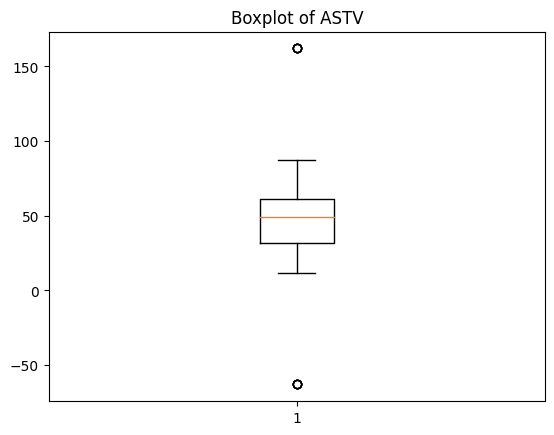

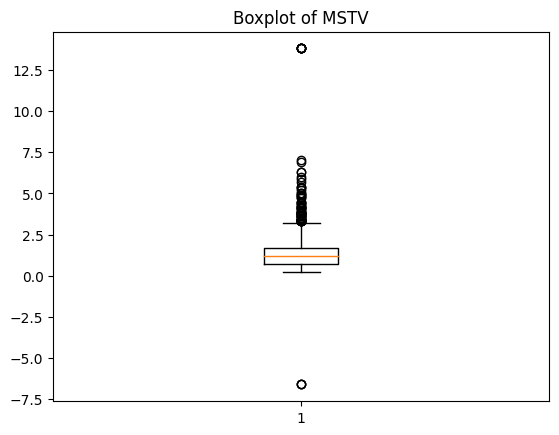

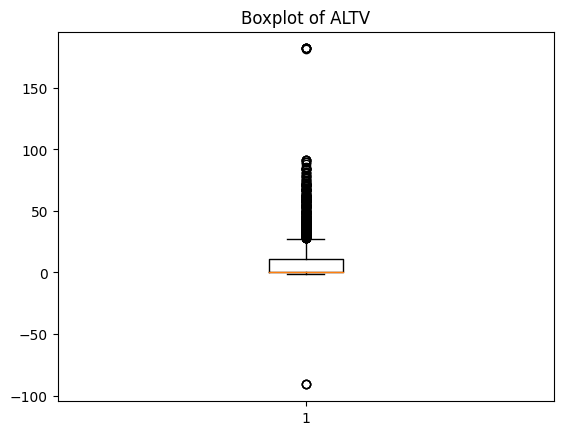

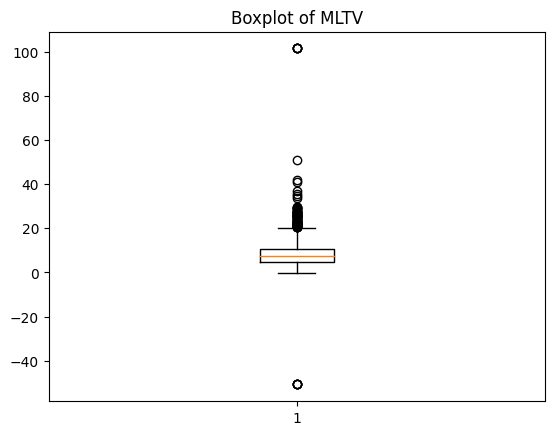

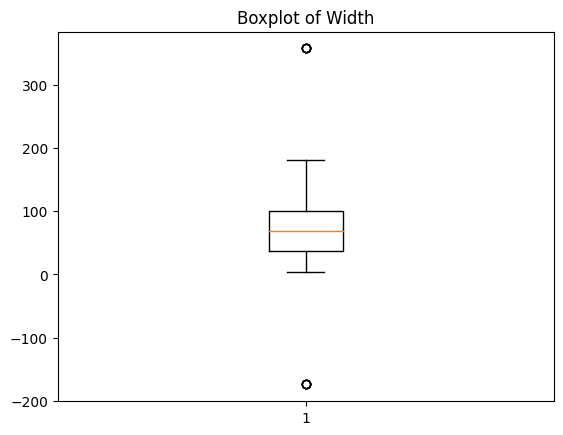

In [158]:
for column in numerical_cols:
    plt.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

In [159]:
df.corr()

LB        AC        FM        UC        DL        DP      ASTV  \
LB     1.000000 -0.062839  0.018776 -0.166201 -0.126536 -0.047724  0.241857   
AC    -0.062839  1.000000  0.009432  0.071863 -0.093196 -0.083277 -0.230439   
FM     0.018776  0.009432  1.000000 -0.053226  0.009718  0.121274 -0.032691   
UC    -0.166201  0.071863 -0.053226  1.000000  0.190128  0.070501 -0.181161   
DL    -0.126536 -0.093196  0.009718  0.190128  1.000000  0.144940 -0.069361   
DP    -0.047724 -0.083277  0.121274  0.070501  0.144940  1.000000  0.038117   
ASTV   0.241857 -0.230439 -0.032691 -0.181161 -0.069361  0.038117  1.000000   
MSTV  -0.169561  0.133649  0.017055  0.189406  0.410102  0.119250 -0.293882   
ALTV   0.210446 -0.271041 -0.011936 -0.227304 -0.186967 -0.077654  0.357497   
MLTV  -0.003457 -0.104875 -0.006237 -0.049351 -0.165198 -0.114084 -0.219728   
Width -0.118425  0.234735  0.097204  0.107159  0.408664  0.175340 -0.206942   

           MSTV      ALTV      MLTV     Width  
LB    -0.169561  0.210446 -0.003457 -0.118425  
AC     0.133649 -0.271041 -0.104875  0.234735  
FM     0.017055 -0.011936 -0.006237  0.097204  
UC     0.189406 -0.227304 -0.049351  0.107159  
DL     0.410102 -0.186967 -0.165198  0.408664  
DP     0.119250 -0.077654 -0.114084  0.175340  
ASTV  -0.293882  0.357497 -0.219728 -0.206942  
MSTV   1.000000 -0.291935  0.028779  0.433064  
ALTV  -0.291935  1.000000 -0.107568 -0.345997  
MLTV   0.028779 -0.107568  1.000000  0.058580  
Width  0.433064 -0.345997  0.058580  1.000000

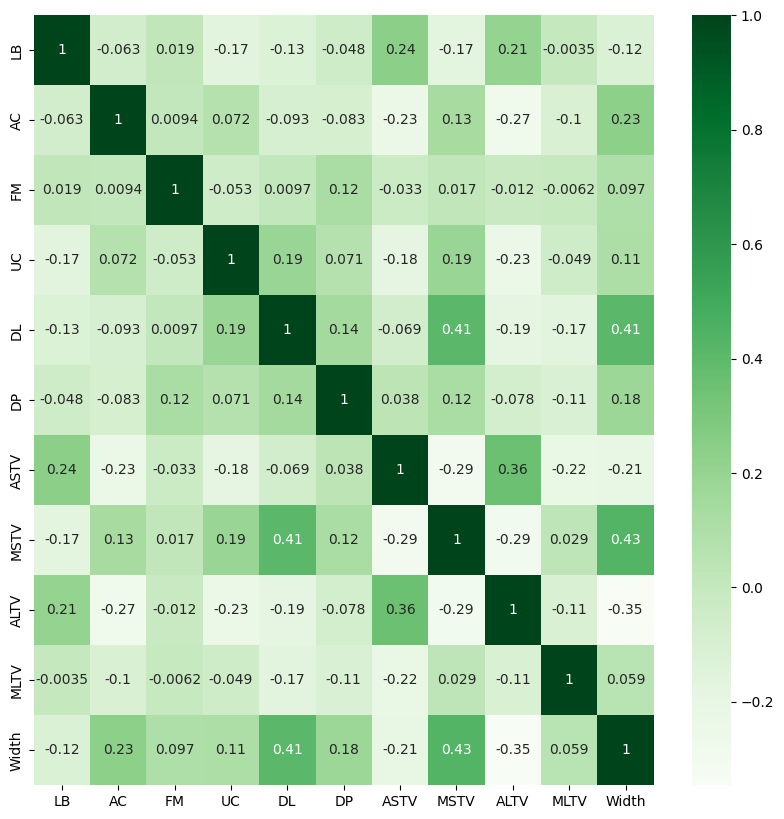

In [160]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="Greens")
plt.show()

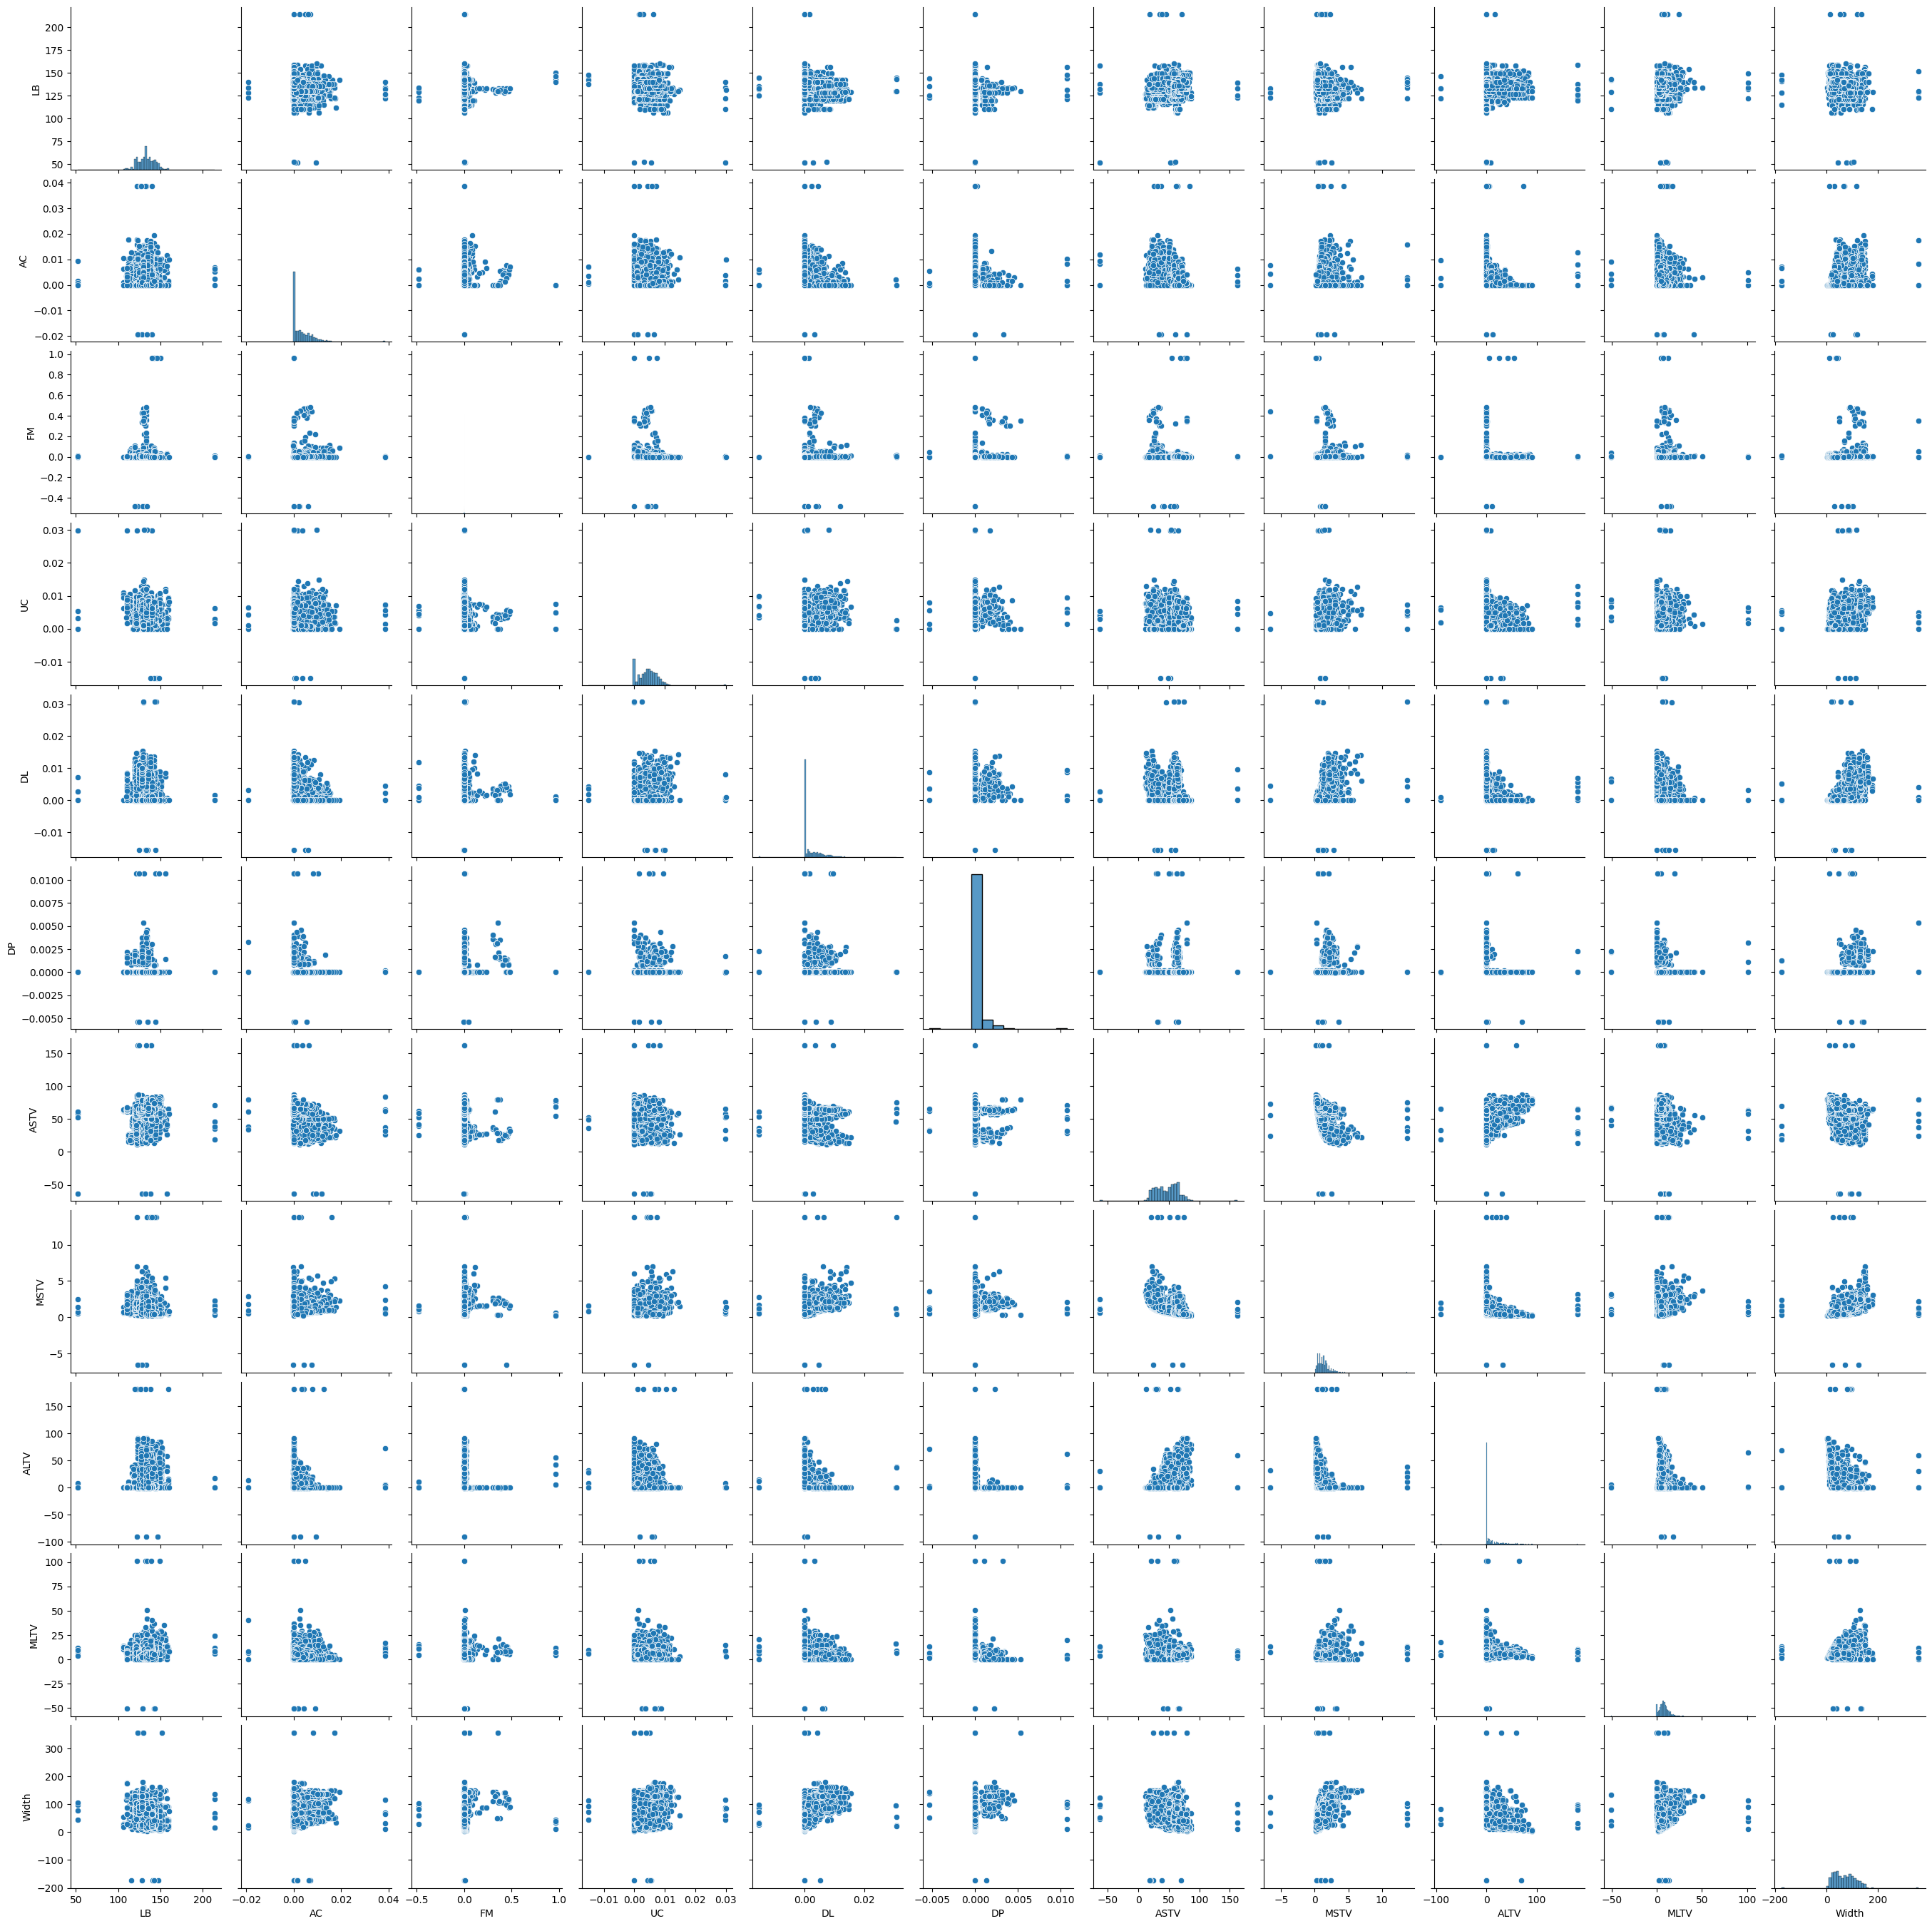

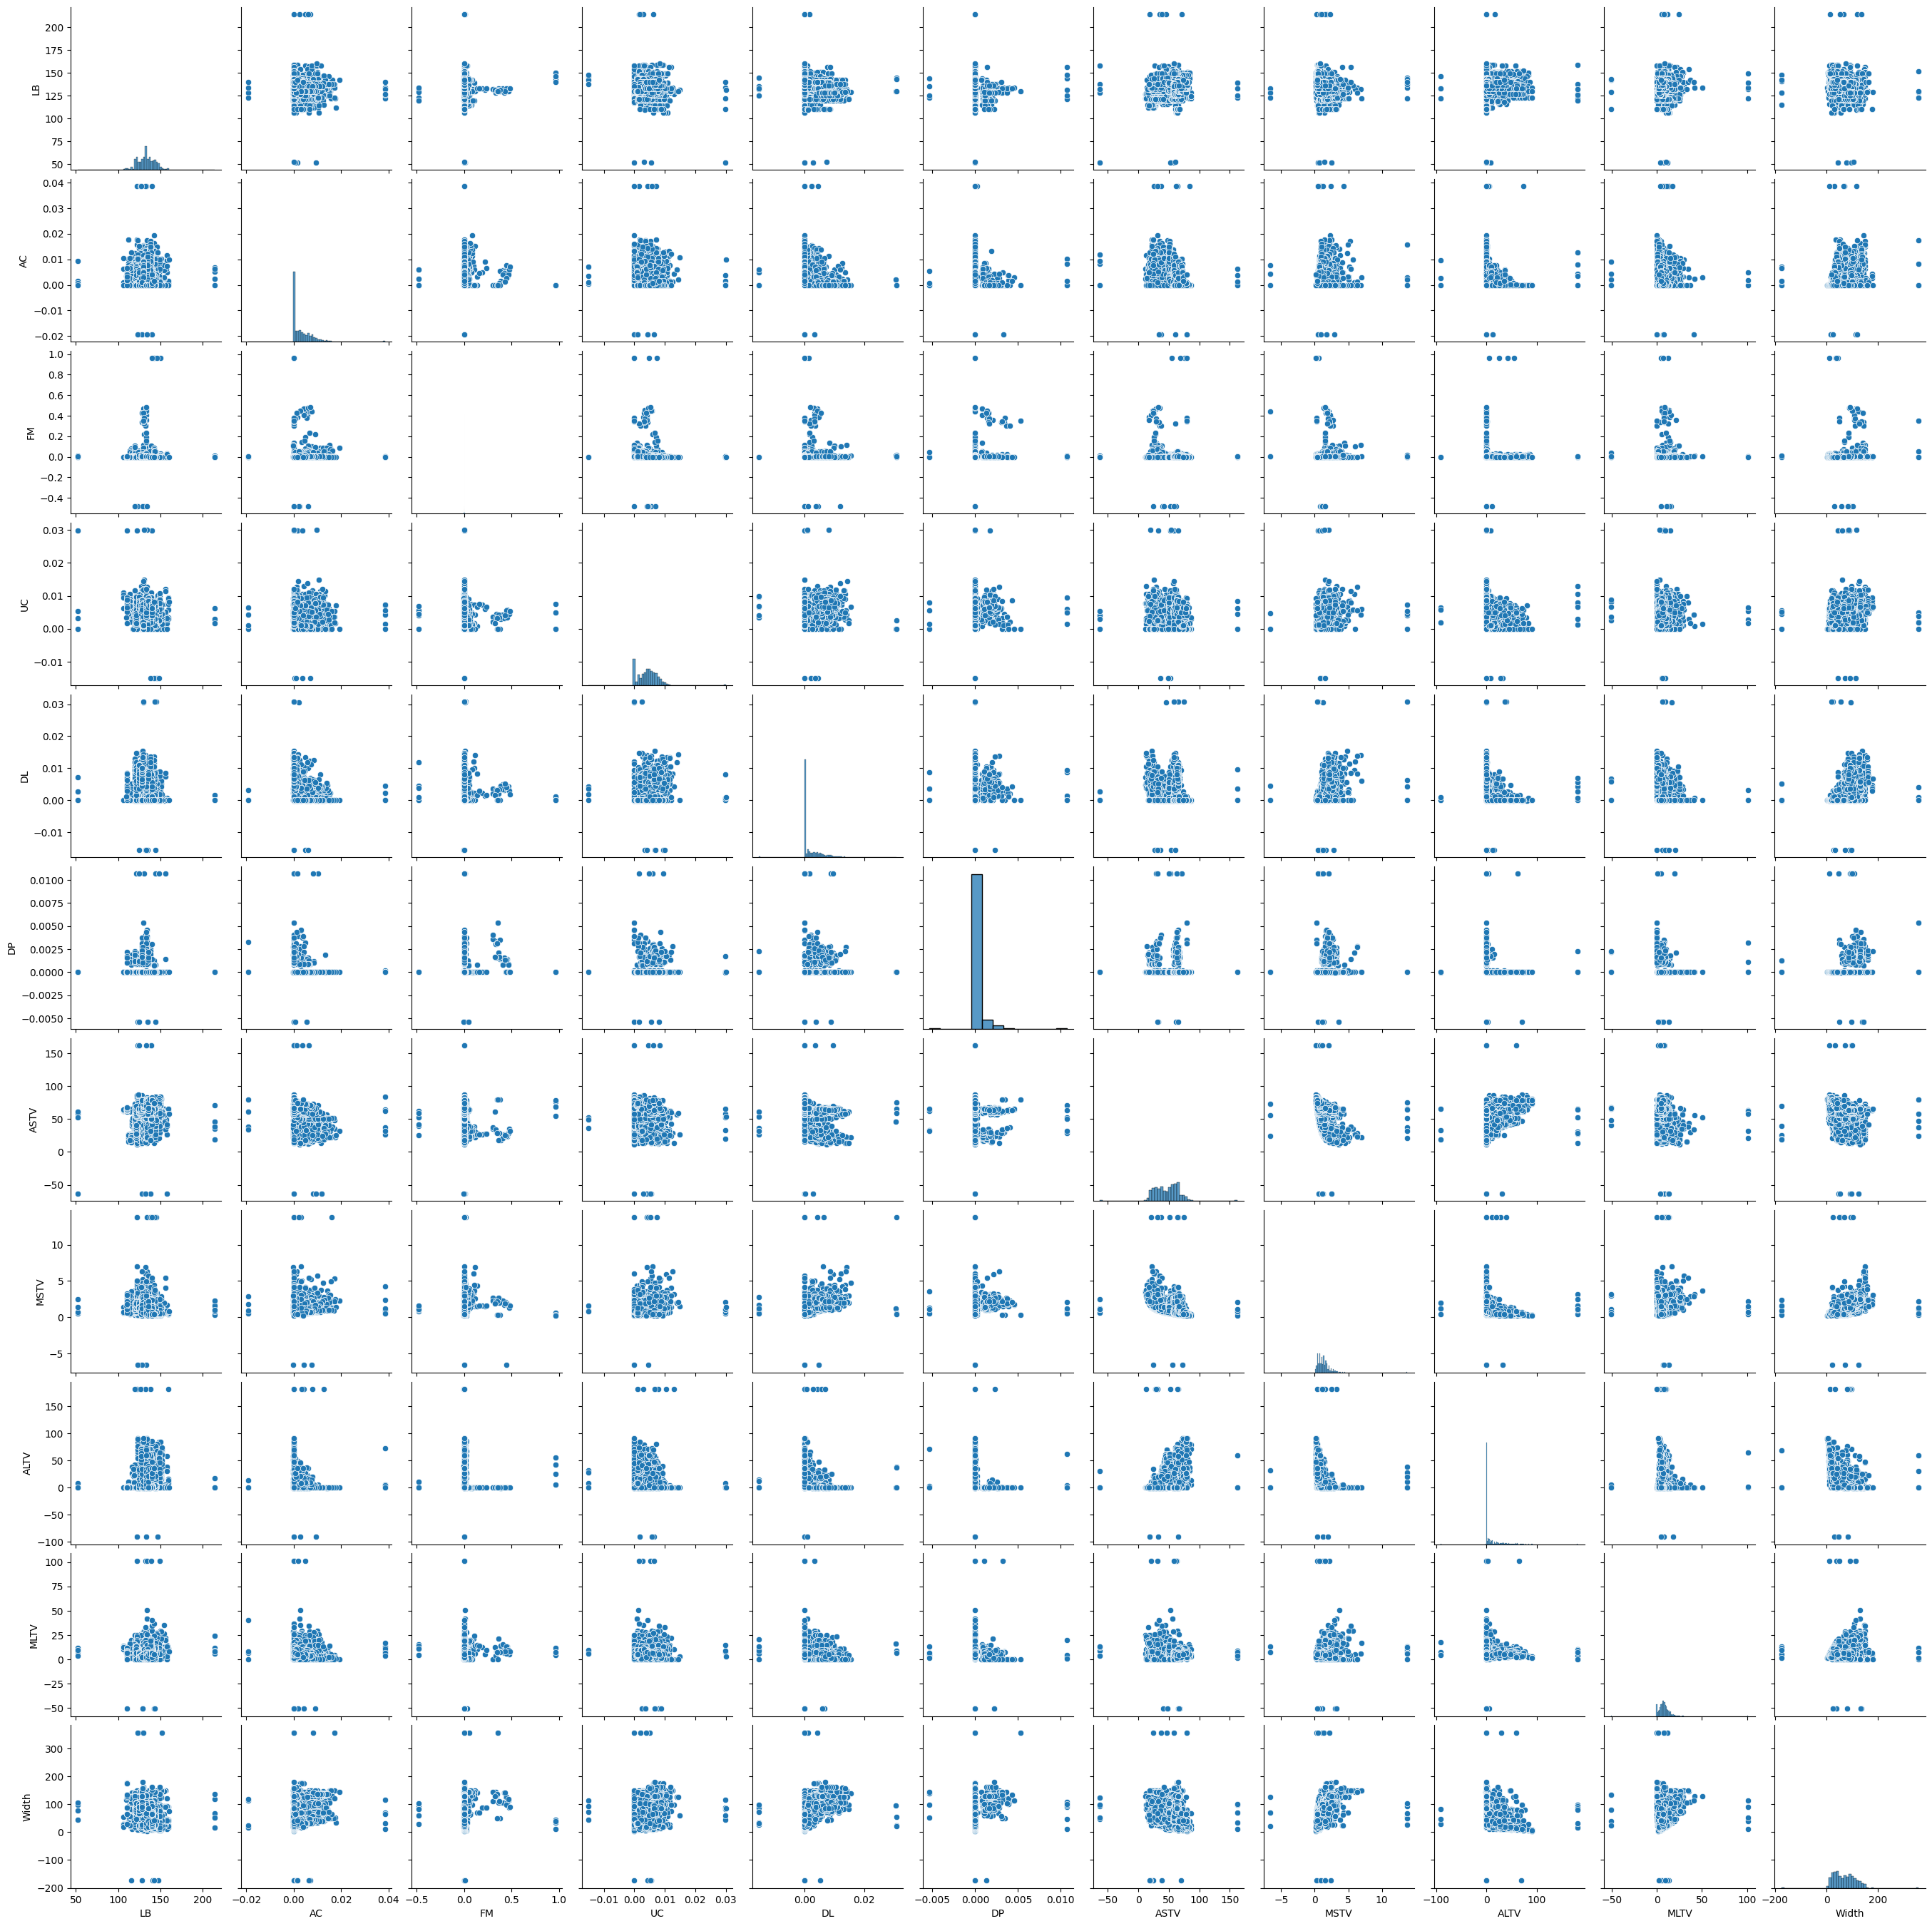

In [138]:
sns.pairplot(df)
plt.show()

In [168]:
std_scaler=StandardScaler()
df=std_scaler.fit_transform(df)
df

array([[-1.19015047, -0.73677129, -0.1465333 , ...,  1.543111  ,
        -0.76105526, -0.15053603],
       [-0.11983905,  0.72341101, -0.1465333 , ..., -0.48518576,
         0.27353413,  1.39480159],
       [-0.03064644,  0.02363927, -0.1465333 , ..., -0.48518576,
         0.66150515,  1.39480159],
       ...,
       [ 0.59370189, -0.51237565, -0.1465333 , ...,  0.45820808,
        -0.28255767, -0.08029341],
       [ 0.59370189, -0.5813852 , -0.1465333 , ...,  0.78839593,
        -0.16616636, -0.10370762],
       [ 0.77208712, -0.36700779, -0.14931116, ...,  1.20618653,
        -0.42481371, -0.66564857]])

SUMMARY

In [ ]:
   Performed EDA on the given dataset 'cardiotocographic.csv'by using Jupyter notebook with  the help of manipulationnlibraries
    and visualization libraries,done the basic analysis on data,handled the null values with mean,removed the duplicates in the data,by
    visualiztion of histogram found some extreme values are there with the help of boxplot visualized the outliers in the data.
    with the help of heatmap found the correlation between the pair variables,and done stastical analysis,and used the standard scaler
    method standaridezied the data in the same scale.with standard data will expect good performance from the model.